In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

## Data Injestion

In [23]:
games_df = pd.read_csv("games.csv")
attendance_df = pd.read_csv("attendance.csv")
standings_df = pd.read_csv("standings.csv")

## Superbowl EDA

In [24]:
standings_df["won_superbowl"] = standings_df.apply(lambda row: row["sb_winner"] == "Won Superbowl", axis=1)

In [29]:
superbowl_winners_df = standings_df.loc[standings_df["sb_winner"] == "Won Superbowl"]

Q: How many wins did each team get in the data set?

In [44]:
def bar_plot_one_column(df, column_name):
    g = sns.catplot(kind="bar", x="team", y=column_name, height=15, data=df)
    plt.xticks(rotation=45)

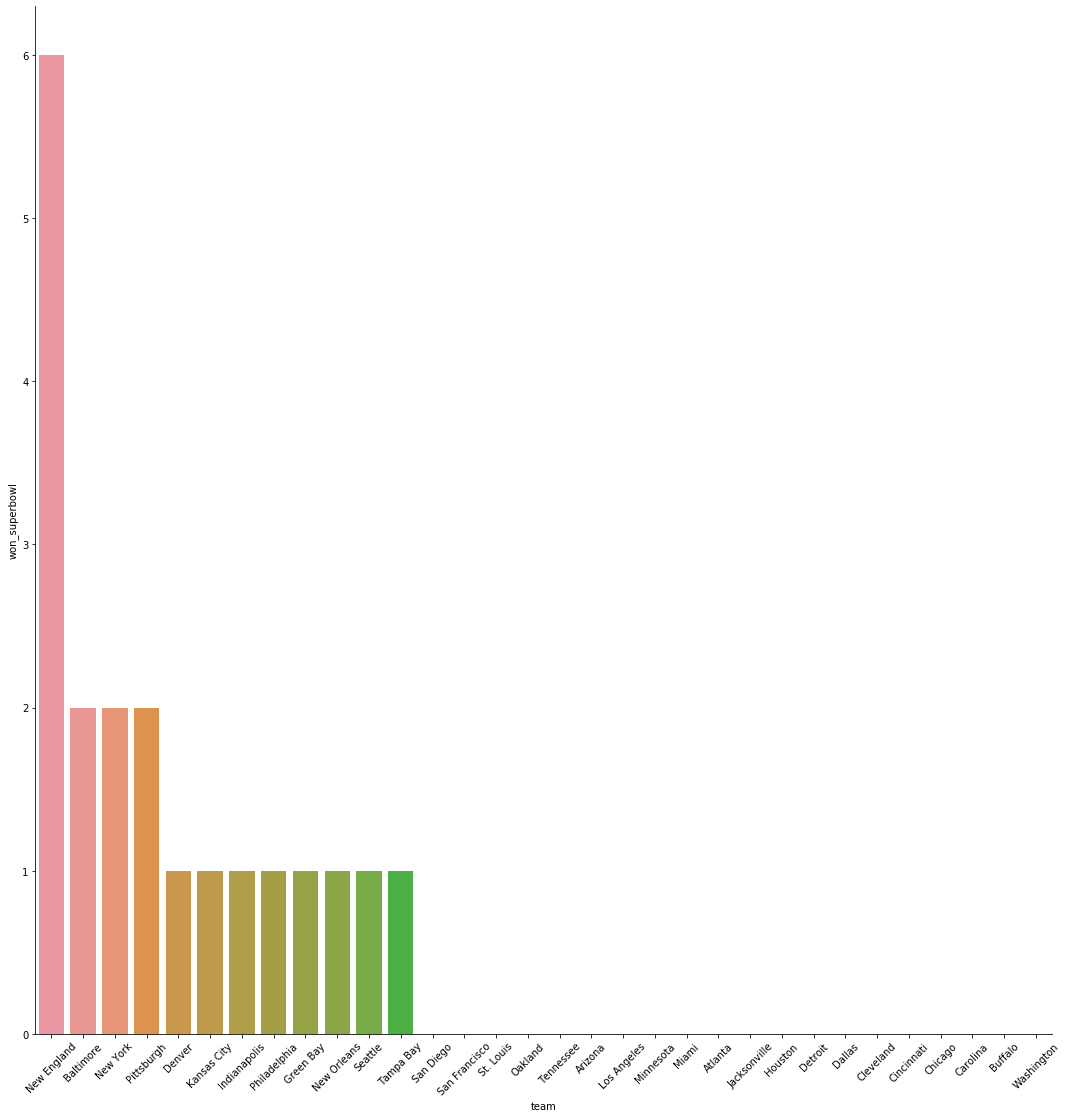

In [45]:
bar_plot_one_column(standings_df.groupby(["team"]).sum().reset_index().sort_values(by="won_superbowl", ascending=False), "won_superbowl")

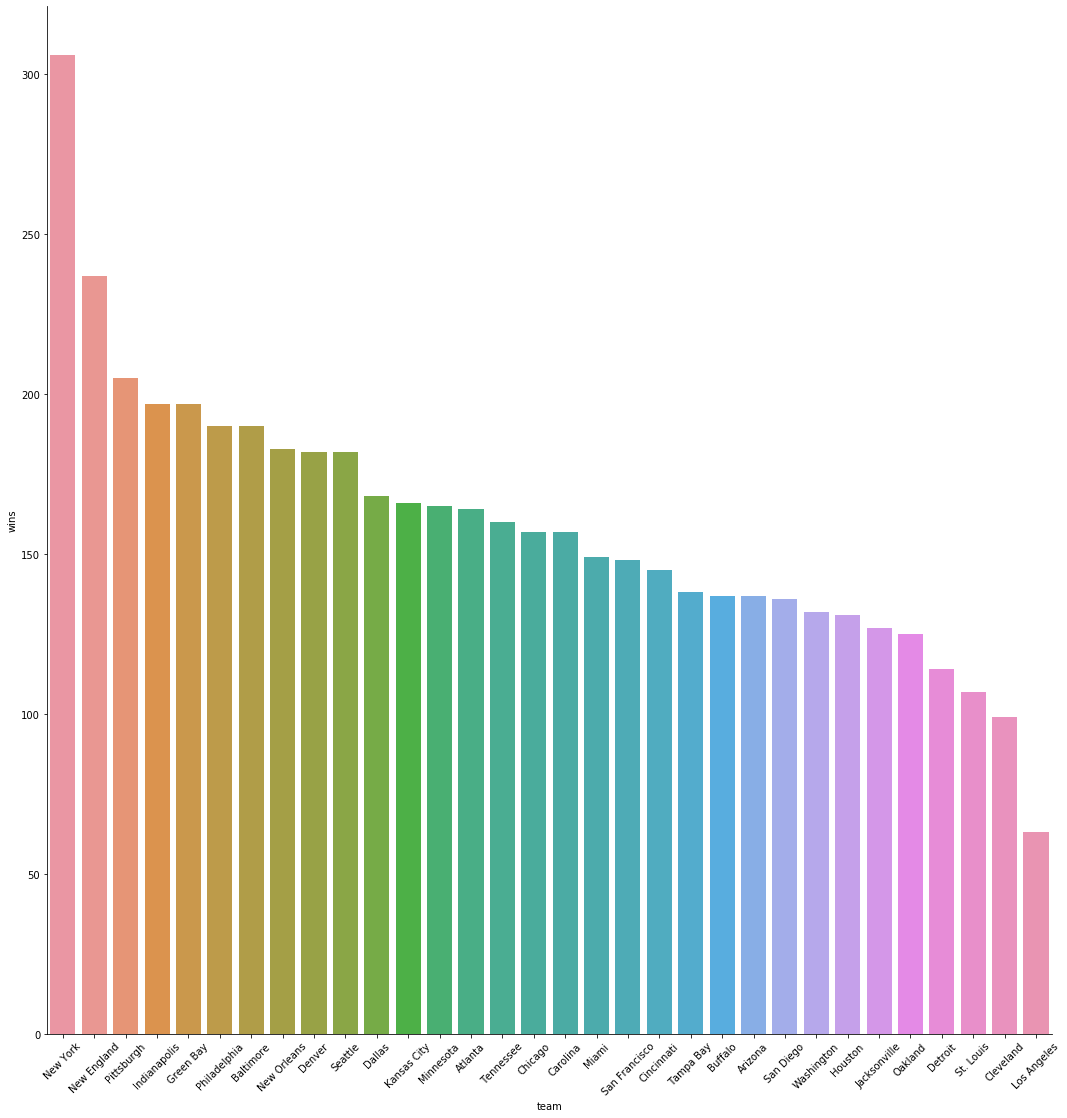

In [46]:
bar_plot_one_column(standings_df.groupby(["team"]).sum().reset_index().sort_values(by="wins", ascending=False), "wins")

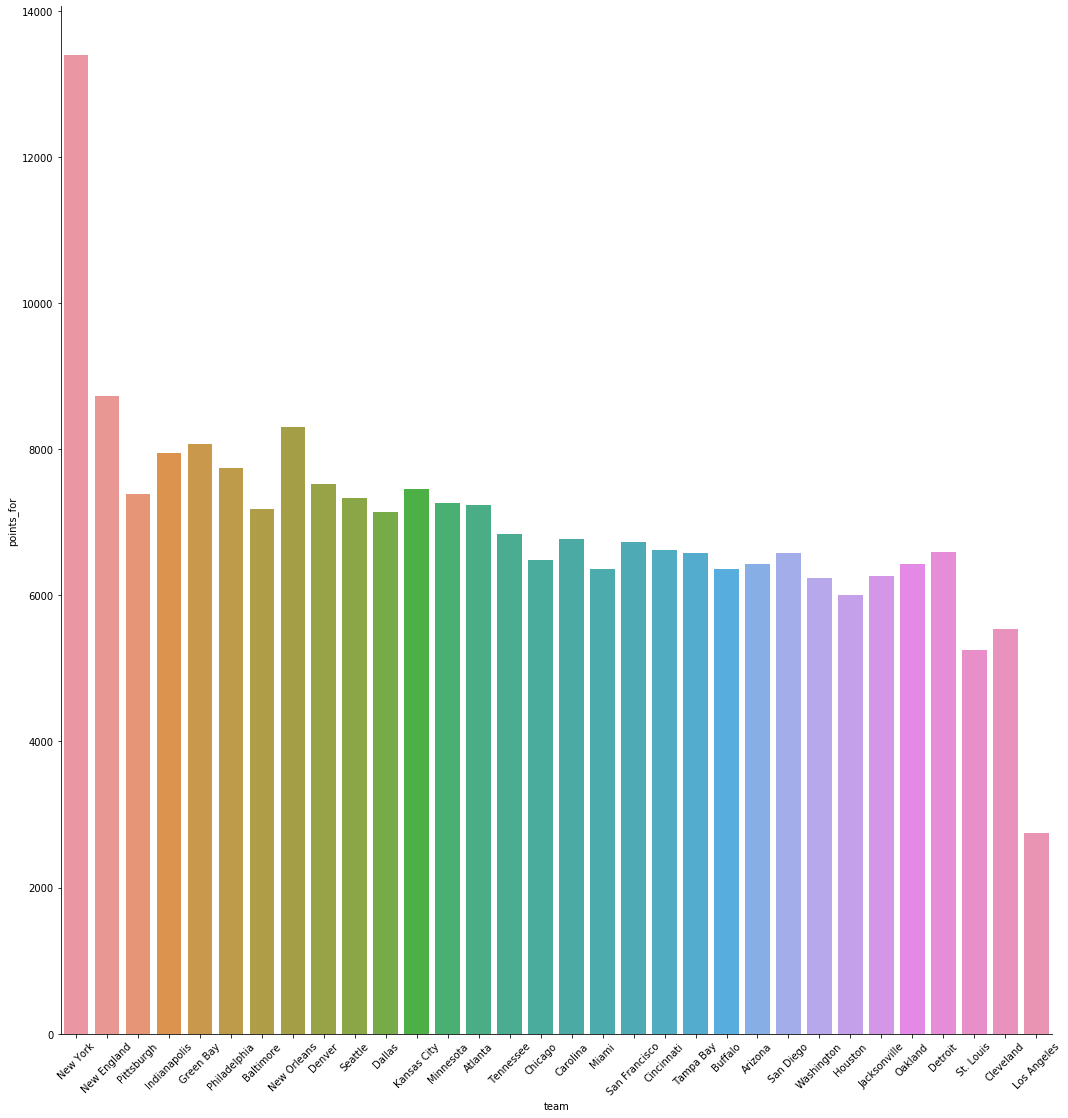

In [47]:
bar_plot_one_column(standings_df.groupby(["team"]).sum().reset_index().sort_values(by="wins", ascending=False), "points_for")

## Quick Model


In [53]:
standings_df

,team,team_name,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner,won_superbowl
0,Miami,Dolphins,2000,11,5,323,226,97,6.1,1.0,7.1,0.0,7.1,Playoffs,No Superbowl,False
1,Indianapolis,Colts,2000,10,6,429,326,103,6.4,1.5,7.9,7.1,0.8,Playoffs,No Superbowl,False
2,New York,Jets,2000,9,7,321,321,0,0.0,3.5,3.5,1.4,2.2,No Playoffs,No Superbowl,False
3,Buffalo,Bills,2000,8,8,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,No Playoffs,No Superbowl,False
4,New England,Patriots,2000,5,11,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,No Playoffs,No Superbowl,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Carolina,Panthers,2019,5,11,340,470,-130,-8.1,1.1,-7.0,-1.9,-5.1,No Playoffs,No Superbowl,False
634,San Francisco,49ers,2019,13,3,479,310,169,10.6,0.4,11.0,6.7,4.3,Playoffs,No Superbowl,False
635,Seattle,Seahawks,2019,11,5,405,398,7,0.4,2.3,2.7,2.9,-0.2,Playoffs,No Superbowl,False
636,Los Angeles,Rams,2019,9,7,394,364,30,1.9,2.0,3.9,2.2,1.7,No Playoffs,No Superbowl,False


In [64]:
X=standings_df[["wins", "loss", "points_for", "points_against", "margin_of_victory"]]
y=standings_df["won_superbowl"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("F1 score of logisitc regression clasifier on test set: {:.2f}".format(f1_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.96
F1 score of logisitc regression clasifier on test set: 0.00


In [65]:
y_test

458    False
530    False
517    False
591    False
85     False
       ...  
605    False
268    False
617    False
107    False
245    False
Name: won_superbowl, Length: 192, dtype: bool

In [66]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
worst_winner_df = standings_df.groupby(["year", "team"]).sum().sort_values(by="points_for")
worst_winner_df.loc[worst_winner_df["won_superbowl"] == True]

# superbowl_winners_df = standings_df.loc[standings_df["sb_winner"] == "Won Superbowl"]

,,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,won_superbowl
year,team,,,,,,,,,,,
2000,Baltimore,12,4,333,165,168,10.5,-2.5,8.0,0.0,8.0,True
2002,Tampa Bay,12,4,346,196,150,9.4,-0.6,8.8,-1.0,9.8,True
2008,Pittsburgh,12,4,347,223,124,7.8,2.0,9.8,1.6,8.2,True
2003,New England,14,2,348,238,110,6.9,0.1,6.9,2.1,4.9,True
2015,Denver,12,4,355,296,59,3.7,2.1,5.8,0.3,5.5,True
2001,New England,11,5,371,272,99,6.2,-1.9,4.3,1.2,3.1,True
2010,Green Bay,10,6,388,240,148,9.3,1.7,10.9,3.1,7.9,True
2005,Pittsburgh,11,5,389,258,131,8.2,-0.4,7.8,3.8,4.0,True
2012,Baltimore,10,6,398,344,54,3.4,-0.5,2.9,1.9,1.0,True
